In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_diabetes = pd.read_csv('Data-2.csv')

In [3]:
# Checking the shape of the dataframe
df_diabetes.shape

(1012, 7)

In [4]:
df_diabetes.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [5]:
df_diabetes.dtypes

Age             float64
Pregnancy No    float64
Weight          float64
Height          float64
BMI             float64
Heredity          int64
Prediction        int64
dtype: object

In [6]:
df_diabetes.isnull().sum()

Age             0
Pregnancy No    0
Weight          0
Height          0
BMI             0
Heredity        0
Prediction      0
dtype: int64

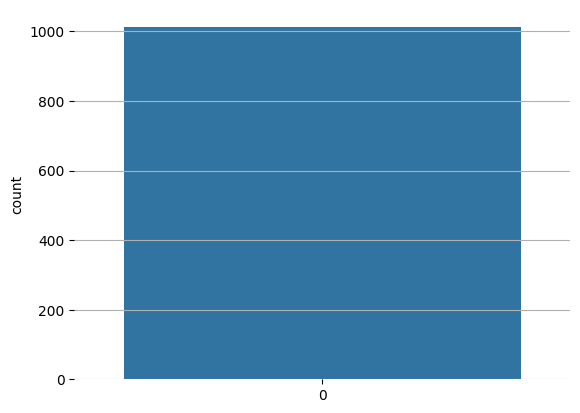

In [7]:
ax = sns.countplot(df_diabetes['Prediction'])

ax.yaxis.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

plt.show()

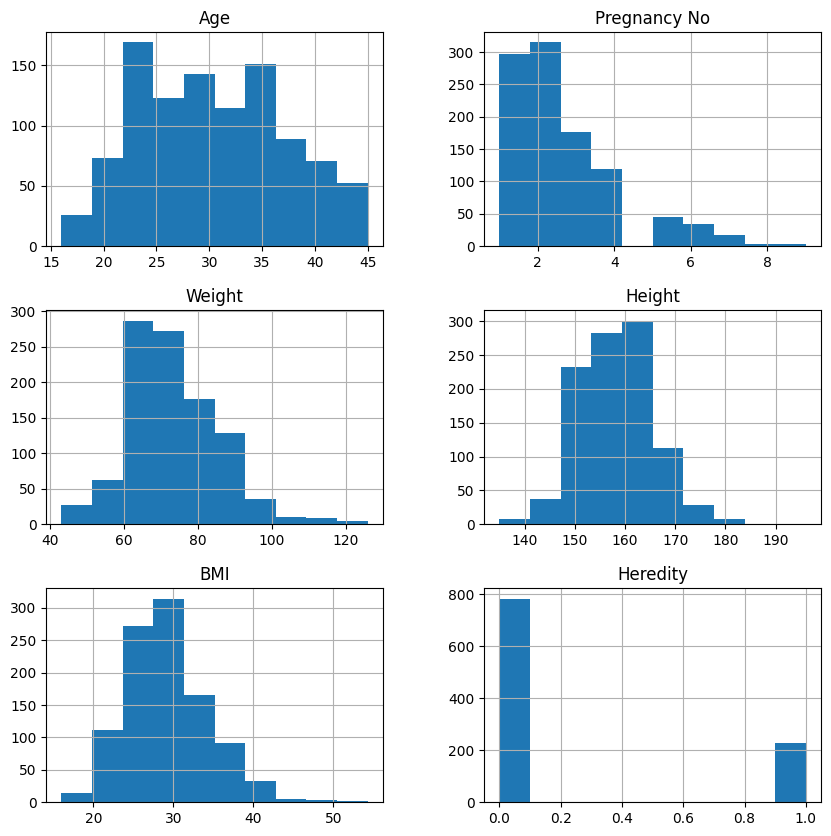

In [8]:
df_diabetes1 = df_diabetes.drop('Prediction', axis=1, inplace=False)

ax = df_diabetes1.hist(figsize = (10,10))
plt.show()

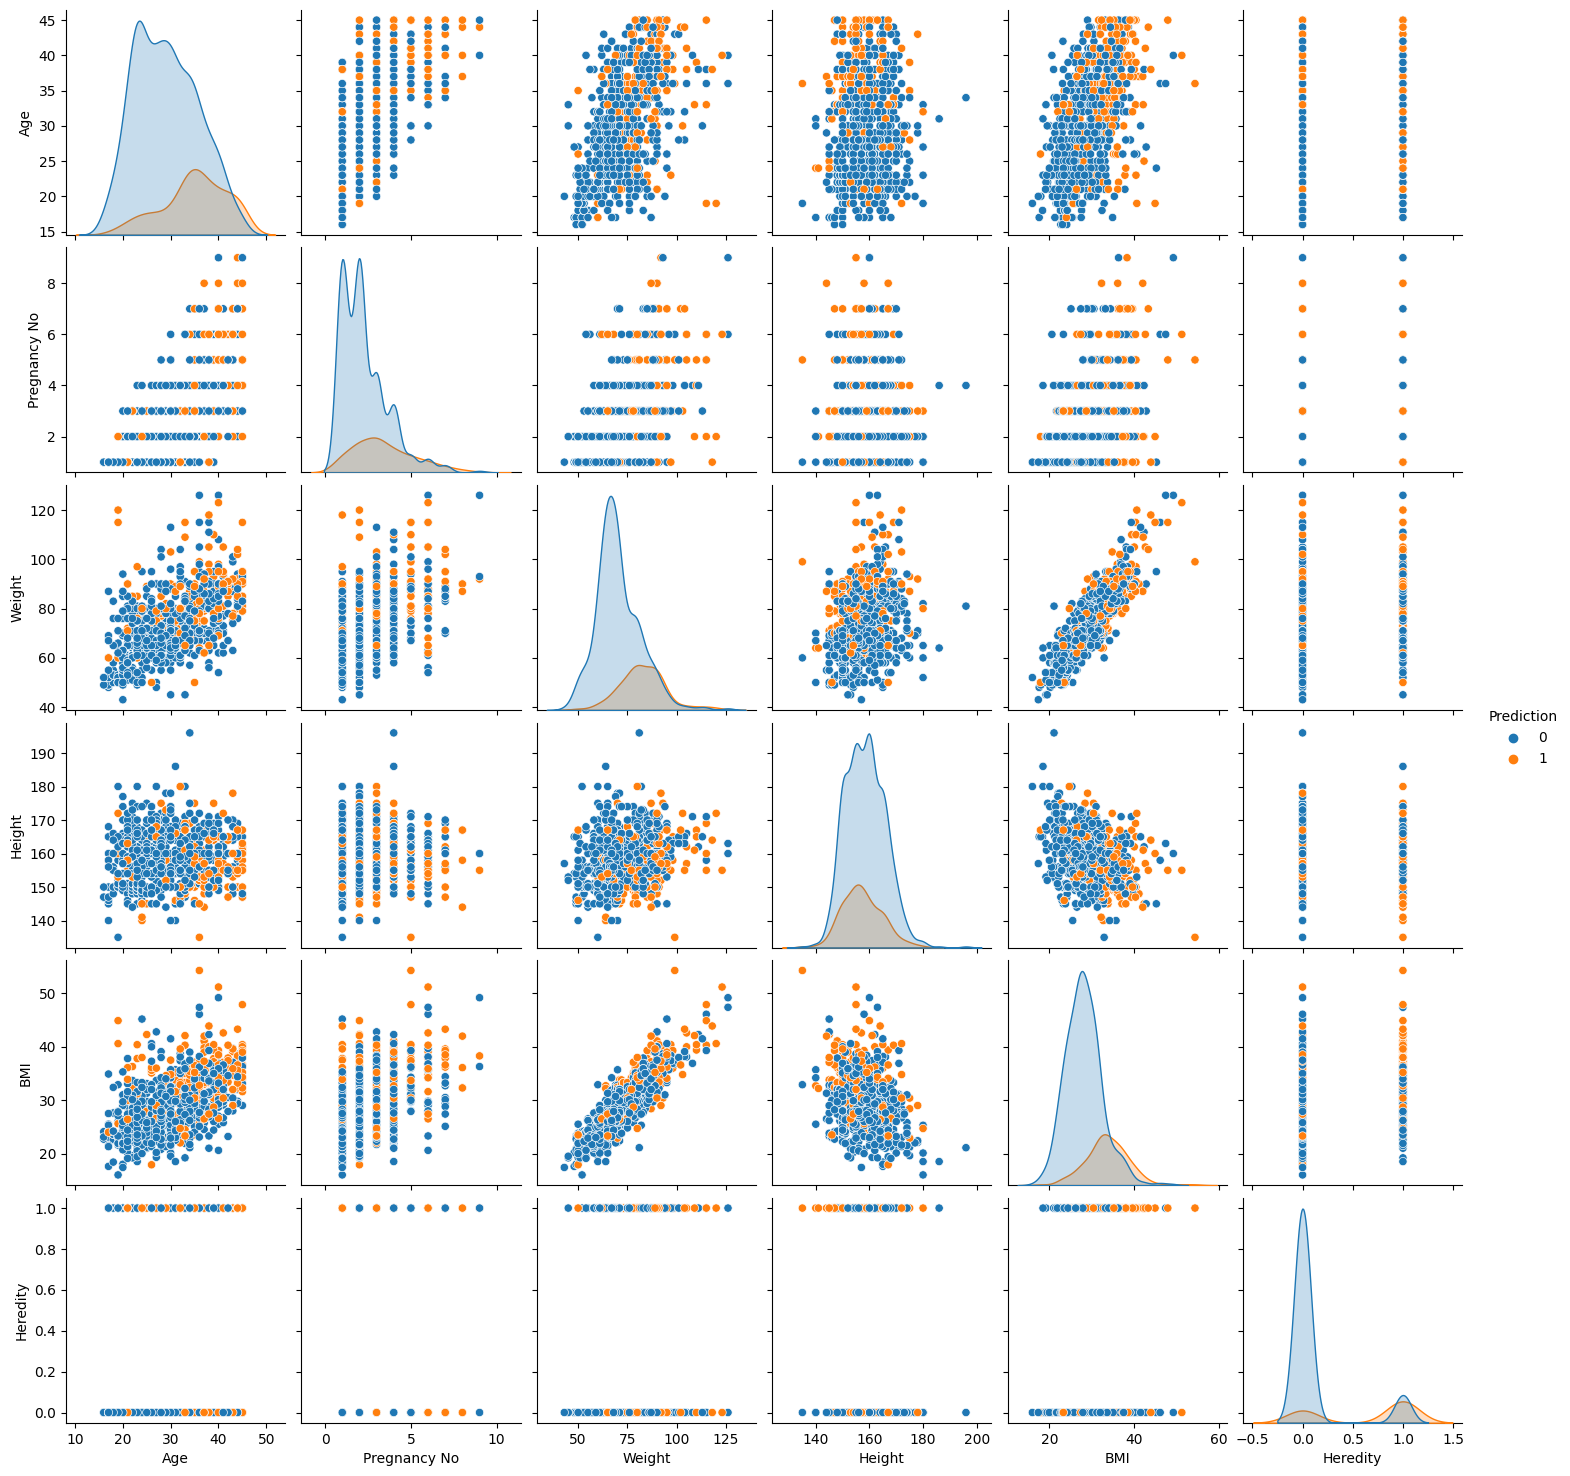

In [9]:
ax = sns.pairplot(df_diabetes, hue = 'Prediction')

In [10]:
y = df_diabetes['Prediction']
X = df_diabetes.drop('Prediction', axis=1, inplace=False)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Age','Pregnancy No','Weight' , 'Height' ,'BMI','Heredity'])
X.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity
0,-1.902946,-0.992082,-1.991641,0.929665,-2.290229,-0.5408
1,-1.902946,-0.992082,-1.911938,-1.786331,-1.170343,-0.5408
2,-1.902946,-0.992082,-1.832234,-2.465330,-0.738107,-0.5408
3,-1.902946,-0.992082,-1.832234,-1.786331,-1.072108,-0.5408
4,-1.902946,-0.992082,-1.911938,-1.650532,-1.229285,-0.5408


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_logreg = logreg.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_logreg))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_logreg))

Confusion Matrix
[[223  14]
 [ 28  39]]


Accuracy
0.8618421052631579


In [15]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred_dectree = dectree.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dectree))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_dectree))

Confusion Matrix
[[208  29]
 [ 30  37]]


Accuracy
0.805921052631579


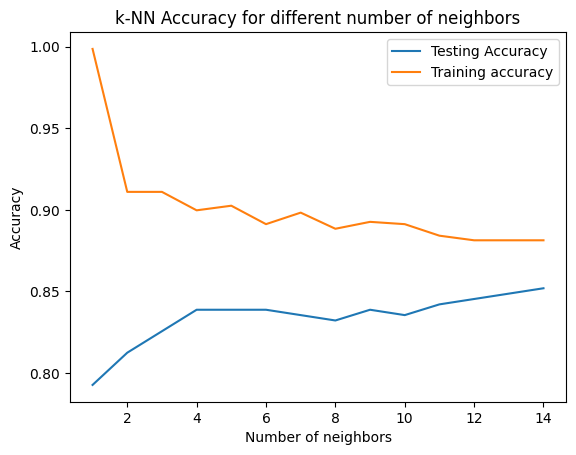

In [17]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [19]:
y_pred_knn = knn.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix
[[219  18]
 [ 28  39]]


Accuracy
0.8486842105263158


In [20]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=1000, random_state=0)
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [21]:
y_pred_ranfor = ranfor.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ranfor))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_ranfor))

Confusion Matrix
[[218  19]
 [ 27  40]]


Accuracy
0.8486842105263158


In [22]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=1000)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [23]:
y_pred_abc = abc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_abc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_abc))

Confusion Matrix
[[216  21]
 [ 27  40]]


Accuracy
0.8421052631578947


In [32]:
# Voting Classifier without weights

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('ranfor',ranfor),('knn',knn),('abc',abc)], 
                      voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('dectree', DecisionTreeClassifier()),
                             ('ranfor',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier(n_neighbors=13)),
                             ('abc', AdaBoostClassifier(n_estimators=1000))],
                 voting='soft')

In [33]:
y_pred_vc = vc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc))

Confusion Matrix
[[221  16]
 [ 28  39]]


Accuracy
0.8552631578947368


In [34]:
vc1 = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('ranfor',ranfor),('knn',knn),('abc',abc)], 
                      voting='soft', weights=[2,1,2,2,1])
vc1.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('dectree', DecisionTreeClassifier()),
                             ('ranfor',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier(n_neighbors=13)),
                             ('abc', AdaBoostClassifier(n_estimators=1000))],
                 voting='soft', weights=[2, 1, 2, 2, 1])

In [35]:
y_pred_vc1 = vc1.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc1))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc1))

Confusion Matrix
[[221  16]
 [ 28  39]]


Accuracy
0.8552631578947368


In [36]:
print('Model Accuracy')
print('\n')
print('Logistic Regression: '+str(round(accuracy_score(y_test, y_pred_logreg)*100,2))+'%')
print('Decision Tree: '+str(round(accuracy_score(y_test, y_pred_dectree)*100,2))+'%')
print('KNN: '+str(round(accuracy_score(y_test, y_pred_knn)*100,2))+'%')
print('\n')
print('Averaging Method')
print('Random Forest: '+str(round(accuracy_score(y_test, y_pred_ranfor)*100,2))+'%')
print('\n')
print('Boosting Method')
print('AdaBoost: '+str(round(accuracy_score(y_test, y_pred_abc)*100,2))+'%')
print('\n')
print('Voting Classifiers')
print('Voting Classifier without Weights: '+str(round(accuracy_score(y_test, y_pred_vc)*100,2))+'%')
print('Voting Classifier with Weights: '+str(round(accuracy_score(y_test, y_pred_vc1)*100,2))+'%')

Model Accuracy


Logistic Regression: 86.18%
Decision Tree: 80.26%
KNN: 84.87%


Averaging Method
Random Forest: 84.87%


Boosting Method
AdaBoost: 84.21%


Voting Classifiers
Voting Classifier without Weights: 85.53%
Voting Classifier with Weights: 85.53%
